In [1]:
# tiep theo cua eda_REACTIVATED

In [2]:
!pip install --upgrade pyspark pyarrow --proxy http://192.168.95.100:3128 --trusted-host files.pythonhosted.org

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 7.1 MB/s eta 0:00:0000:0100:01m
DEPRECATION: recommenders 1.0.0 has a non-standard dependency specifier pydocumentdb>=2.3.3<3. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of recommenders or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# START

In [3]:
import joblib

In [4]:
from sklearn import metrics

In [5]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Add path ../..
Connected DB - conn
Connected oraDW_ANALYTICS - conn_aly


# INPUT

In [7]:
feat_list = joblib.load('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/feat_list_354')

fis_X_train = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/X_train.pkl', 'gzip')[feat_list]
fis_y_train = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/y_train.pkl', 'gzip')
fis_X_val = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/X_val.pkl', 'gzip')[feat_list]
fis_y_val = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/y_val.pkl', 'gzip')
fis_X_test = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/X_test.pkl', 'gzip')[feat_list]
fis_y_test = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/y_test.pkl', 'gzip')

In [8]:
fis_X_train

CASA_HOLD  CARD_CREDIT_HOLD  AREA_VN0010007  \
RPT_DT     CUSTOMER_CDE                                                
01-07-2022 745727                1                 0               0   
           13547882              1                 0               0   
           3559838               1                 0               0   
           13463820              1                 0               1   
           1321788               1                 0               0   
...                            ...               ...             ...   
01-08-2022 10659183              0                 0               0   
           1800315               1                 0               0   
           5872494               1                 0               1   
           8158117               1                 0               0   
           14863434              1                 0               1   

                              LOR  AREA_VN0010005  AREA_VN0010006  \
RPT_DT     CUSTOMER_CDE                                             
01-07-2022 745727        0.151633               0               0   
           13547882      0.559482               1               0   
           3559838       0.112595               0               0   
           13463820      0.322170               0               0   
           1321788       0.420793               0               1   
...                           ...             ...             ...   
01-08-2022 10659183      0.184097               0               1   
           1800315       0.449969               0               1   
           5872494       0.599753               0               0   
           8158117       0.586398               0               0   
           14863434      0.282309               0               0   

                         EB_SACOMPAY_DAY_SINCE_LTST_LOGIN  AREA_VN0010004  \
RPT_DT     CUSTOMER_CDE                                                     
01-07-2022 745727                                0.633790               0   
           13547882                              0.999087               0   
           3559838                               0.466667               1   
           13463820                              0.999087               0   
           1321788                               0.999087               0   
...                                                   ...             ...   
01-08-2022 10659183                              0.999087               0   
           1800315                               0.999087               0   
           5872494                               0.999087               0   
           8158117                               0.999087               0   
           14863434                              0.999087               0   

                         EB_SACOMPAY_HOLD  AREA_VN0010001  ...  LIFE_STG_3  \
RPT_DT     CUSTOMER_CDE                                    ...               
01-07-2022 745727                       1               0  ...           0   
           13547882                     0               0  ...           0   
           3559838                      1               0  ...           0   
           13463820                     0               0  ...           0   
           1321788                      0               0  ...           0   
...                                   ...             ...  ...         ...   
01-08-2022 10659183                     0               0  ...           0   
           1800315                      0               0  ...           0   
           5872494                      0               0  ...           0   
           8158117                      0               0  ...           0   
           14863434                     0               0  ...           0   

                         DIST_CUST_FAV_POS_TOP1  \
RPT_DT     CUSTOMER_CDE                           
01-07-2022 745727                      0.156484   
           13547882 

In [59]:
fis_X_train.describe()

,CASA_HOLD,CARD_CREDIT_HOLD,AREA_VN0010007,LOR,AREA_VN0010005,AREA_VN0010006,EB_SACOMPAY_DAY_SINCE_LTST_LOGIN,AREA_VN0010004,EB_SACOMPAY_HOLD,AREA_VN0010001,...,LIFE_STG_3,DIST_CUST_FAV_POS_TOP1,CARD_CREDIT_MAX_CLASS_OTHER_BANK_1,AREA_VN0010003,CARD_CREDIT_MAX_CLASS_OTHER_BANK_4,CARD_CREDIT_MAX_CLASS_OTHER_BANK_2,DIST_CUST_FAV_ATM,CARD_CREDIT_MAX_CLASS_OTHER_BANK_5,CREDIT_SCORE,CARD_CREDIT_SUM_BAL_NOW
count,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,...,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06,5.548946e+06
mean,8.653937e-01,2.548592e-02,2.212449e-01,4.366399e-01,1.341529e-01,2.725182e-01,9.580116e-01,7.213983e-02,8.273751e-02,3.812165e-02,...,2.238094e-01,1.560817e-01,5.532762e-03,7.621267e-02,1.160581e-03,3.507873e-03,7.037654e-03,1.998578e-04,4.378907e-01,2.598868e-03
std,3.413026e-01,1.575957e-01,4.150851e-01,2.404184e-01,3.408165e-01,4.452551e-01,1.605856e-01,2.587193e-01,2.754851e-01,1.914899e-01,...,4.167958e-01,1.359051e-02,7.417649e-02,2.653381e-01,3.404753e-02,5.912334e-02,1.065714e-02,1.413569e-02,3.406309e-02,3.231923e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,2.410109e-01,0.000000e+00,0.000000e+00,9.990867e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.555651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.801312e-03,0.000000e+00,4.377878e-01,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,4.320937e-01,0.000000e+00,0.000000e+00,9.990867e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.564842e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.801312e-03,0.000000e+00,4.381472e-01,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,5.839326e-01,0.000000e+00,1.000000e+00,9.990867e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.564842e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.818411e-03,0.000000e+00,4.381472e-01,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,9.874666e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,9.901500e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [60]:
feat_list

['CASA_HOLD',
 'CARD_CREDIT_HOLD',
 'AREA_VN0010007',
 'LOR',
 'AREA_VN0010005',
 'AREA_VN0010006',
 'EB_SACOMPAY_DAY_SINCE_LTST_LOGIN',
 'AREA_VN0010004',
 'EB_SACOMPAY_HOLD',
 'AREA_VN0010001',
 'LIFE_STG_1',
 'EB_MBIB_HOLD',
 'CASA_DAY_SINCE_LTST_TXN',
 'LIFE_STG_5',
 'EB_MBIB_DAY_SINCE_ACTIVE',
 'LIFE_STG_4',
 'CASA_SUM_BAL_NOW',
 'LIFE_STG_2',
 'AREA_VN0010002',
 'CARD_CREDIT_CT_OTHER_BNK',
 'CARD_CREDIT_MAX_CLASS_OTHER_BANK_0',
 'CARD_CREDIT_SUM_BAL_AMT_OTHER_BNK',
 'CARD_CREDIT_MAX_LIMIT',
 'CARD_CREDIT_MAX_CLASS_OTHER_BANK_3',
 'EB_SACOMPAY_DAY_SINCE_LTST_TXN',
 'LIFE_STG_3',
 'DIST_CUST_FAV_POS_TOP1',
 'CARD_CREDIT_MAX_CLASS_OTHER_BANK_1',
 'AREA_VN0010003',
 'CARD_CREDIT_MAX_CLASS_OTHER_BANK_4',
 'CARD_CREDIT_MAX_CLASS_OTHER_BANK_2',
 'DIST_CUST_FAV_ATM',
 'CARD_CREDIT_MAX_CLASS_OTHER_BANK_5',
 'CREDIT_SCORE',
 'CARD_CREDIT_SUM_BAL_NOW']

In [9]:
fis_X_val

CASA_HOLD  CARD_CREDIT_HOLD  AREA_VN0010007  \
RPT_DT     CUSTOMER_CDE                                                
01-09-2022 6912353               1                 0               0   
           14264                 1                 0               0   
           8840034               1                 0               0   
           6272211               1                 0               0   
           4245286               1                 0               0   
...                            ...               ...             ...   
           12707658              1                 0               0   
           5844875               1                 0               0   
           6296100               1                 0               0   
           2148174               1                 0               0   
           3569581               1                 0               0   

                              LOR  AREA_VN0010005  AREA_VN0010006  \
RPT_DT     CUSTOMER_CDE                                             
01-09-2022 6912353       0.336552               0               1   
           14264         0.977604               1               0   
           8840034       0.247380               0               1   
           6272211       0.589275               0               1   
           4245286       0.247175               0               0   
...                           ...             ...             ...   
           12707658      0.960962               0               1   
           5844875       0.802548               0               0   
           6296100       0.624409               0               0   
           2148174       0.681323               1               0   
           3569581       0.106637               0               0   

                         EB_SACOMPAY_DAY_SINCE_LTST_LOGIN  AREA_VN0010004  \
RPT_DT     CUSTOMER_CDE                                                     
01-09-2022 6912353                               0.999087               0   
           14264                                 0.999087               0   
           8840034                               0.999087               0   
           6272211                               0.999087               0   
           4245286                               0.999087               0   
...                                                   ...             ...   
           12707658                              0.999087               0   
           5844875                               0.999087               1   
           6296100                               0.999087               0   
           2148174                               0.999087               0   
           3569581                               0.999087               1   

                         EB_SACOMPAY_HOLD  AREA_VN0010001  ...  LIFE_STG_3  \
RPT_DT     CUSTOMER_CDE                                    ...               
01-09-2022 6912353                      0               0  ...           0   
           14264                        0               0  ...           0   
           8840034                      0               0  ...           0   
           6272211                      0               0  ...           0   
           4245286                      0               0  ...           0   
...                                   ...             ...  ...         ...   
           12707658                     0               0  ...           0   
           5844875                      0               0  ...           0   
           6296100                      0               0  ...           0   
           2148174                      0               0  ...           0   
           3569581                      0               0  ...           0   

                         DIST_CUST_FAV_POS_TOP1  \
RPT_DT     CUSTOMER_CDE                           
01-09-2022 6912353                       0.1511   
           14264    

In [10]:
fis_X_test

CASA_HOLD  CARD_CREDIT_HOLD  AREA_VN0010007  \
RPT_DT     CUSTOMER_CDE                                                
01-10-2022 431366                1                 0               0   
           5273693               1                 0               0   
           12675954              1                 0               0   
           2085797               1                 0               0   
           9468840               1                 0               0   
...                            ...               ...             ...   
           14883950              1                 0               0   
           4975206               1                 0               0   
           4294206               1                 0               1   
           7016078               1                 0               0   
           12952540              1                 0               0   

                              LOR  AREA_VN0010005  AREA_VN0010006  \
RPT_DT     CUSTOMER_CDE                                             
01-10-2022 431366        0.170742               1               0   
           5273693       0.978015               1               0   
           12675954      0.784056               1               0   
           2085797       0.213684               0               1   
           9468840       0.168482               1               0   
...                           ...             ...             ...   
           14883950      0.632833               0               1   
           4975206       0.245120               1               0   
           4294206       0.529690               0               0   
           7016078       0.813026               0               0   
           12952540      0.383604               0               0   

                         EB_SACOMPAY_DAY_SINCE_LTST_LOGIN  AREA_VN0010004  \
RPT_DT     CUSTOMER_CDE                                                     
01-10-2022 431366                                0.999087               0   
           5273693                               0.999087               0   
           12675954                              0.999087               0   
           2085797                               0.999087               0   
           9468840                               0.999087               0   
...                                                   ...             ...   
           14883950                              0.999087               0   
           4975206                               0.526027               0   
           4294206                               0.999087               0   
           7016078                               0.999087               0   
           12952540                              0.999087               0   

                         EB_SACOMPAY_HOLD  AREA_VN0010001  ...  LIFE_STG_3  \
RPT_DT     CUSTOMER_CDE                                    ...               
01-10-2022 431366                       0               0  ...           0   
           5273693                      0               0  ...           1   
           12675954                     0               0  ...           1   
           2085797                      0               0  ...           0   
           9468840                      0               0  ...           0   
...                                   ...             ...  ...         ...   
           14883950                     0               0  ...           0   
           4975206                      1               0  ...           0   
           4294206                      0               0  ...           0   
           7016078                      0               0  ...           0   
           12952540                     0               0  ...           0   

                         DIST_CUST_FAV_POS_TOP1  \
RPT_DT     CUSTOMER_CDE                           
01-10-2022 431366                      0.145354   
           5273693  

In [11]:
fis_y_train.value_counts(normalize=True)

0    0.956128
1    0.043872
Name: REACTIVATED, dtype: float64

In [12]:
fis_y_val.value_counts(normalize=True)

0    0.970125
1    0.029875
Name: REACTIVATED, dtype: float64

In [13]:
fis_y_test.value_counts(normalize=True)

0    0.965544
1    0.034456
Name: REACTIVATED, dtype: float64

In [14]:
# fis_model = joblib.load('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/REACTIVE_CLASSIFICATION_354')

In [15]:
from xgboost import XGBClassifier
bst = XGBClassifier()
bst.fit(fis_X_train, fis_y_train)
fis_model = bst

## FIS-EVALUATE

In [16]:
fis_y_train_pred = fis_model.predict(fis_X_train)
fis_y_train_prob = fis_model.predict_proba(fis_X_train)
fis_y_val_pred = fis_model.predict(fis_X_val)
fis_y_val_prob = fis_model.predict_proba(fis_X_val)
fis_y_test_pred = fis_model.predict(fis_X_test)
fis_y_test_prob = fis_model.predict_proba(fis_X_test)

In [17]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_train, fis_y_train_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_train, fis_y_train_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.7646823125357756,
 0.10975053708671023,
 0.19195137634122772,
 0.7855353595133565,
 0.571070719026713)

In [18]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_val, fis_y_val_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_val, fis_y_val_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.7454065413007166,
 0.16810460057841398,
 0.27433988081663413,
 0.7289786246599463,
 0.4579572493198927)

In [19]:
p,r,f,_ = metrics.precision_recall_fscore_support(fis_y_test, fis_y_test_pred, average='binary')
auc = metrics.roc_auc_score(fis_y_test, fis_y_test_prob[:,1])
gini = 2 * auc - 1
p,r,f,auc, gini

(0.6554043319387809,
 0.12957534131836837,
 0.2163730932295992,
 0.7312896647441558,
 0.4625793294883116)

In [20]:
# fig, axs = plt.subplots(1,3, figsize=(15, 5))
# metrics.RocCurveDisplay.from_predictions(fis_y_train, fis_y_train_pred, plot_chance_level=True, ax=axs[0], color='orange')
# metrics.RocCurveDisplay.from_predictions(fis_y_val, fis_y_val_pred, plot_chance_level=True, ax=axs[1], color='orange')
# metrics.RocCurveDisplay.from_predictions(fis_y_test, fis_y_test_pred, plot_chance_level=True, ax=axs[2], color='orange')
# axs[0].set_title('ROC-AUC Train')
# axs[1].set_title('ROC-AUC Val')
# axs[2].set_title('ROC-AUC Test')
# plt.show()

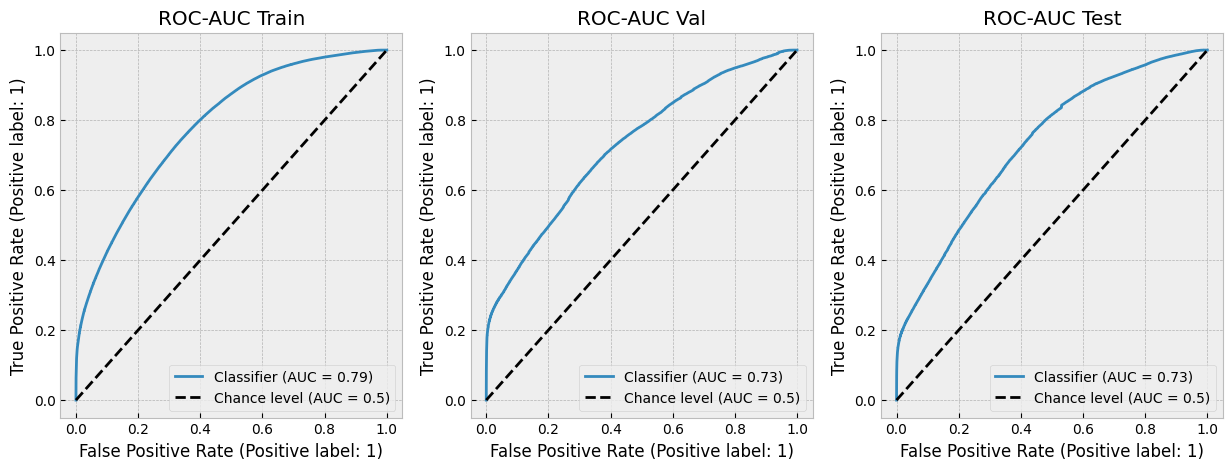

In [53]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
metrics.RocCurveDisplay.from_predictions(fis_y_train, fis_y_train_prob[:,1], plot_chance_level=True, ax=axs[0])
metrics.RocCurveDisplay.from_predictions(fis_y_val, fis_y_val_prob[:,1], plot_chance_level=True, ax=axs[1])
metrics.RocCurveDisplay.from_predictions(fis_y_test, fis_y_test_prob[:,1], plot_chance_level=True, ax=axs[2])
axs[0].set_title('ROC-AUC Train')
axs[1].set_title('ROC-AUC Val')
axs[2].set_title('ROC-AUC Test')
plt.show()

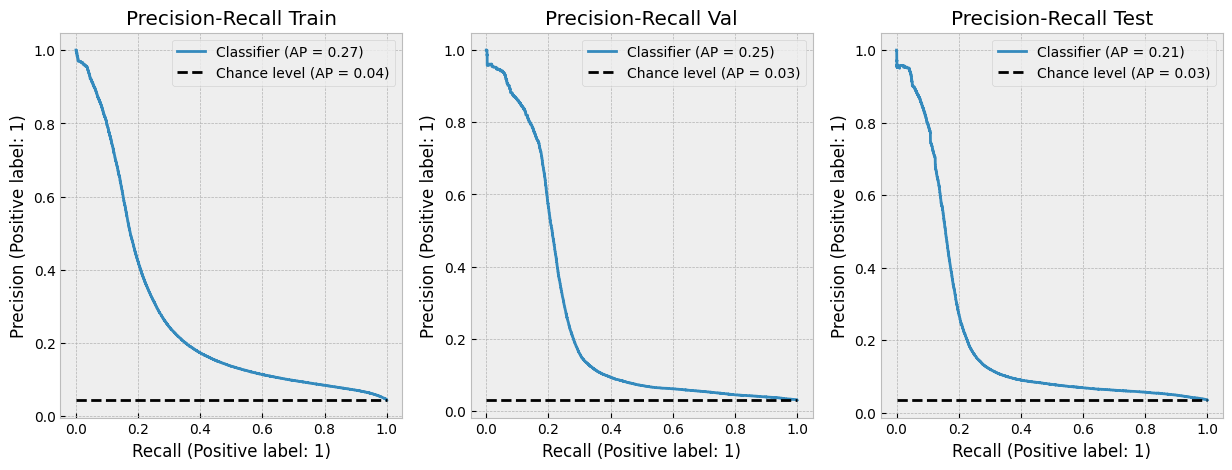

In [56]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
metrics.PrecisionRecallDisplay.from_predictions(fis_y_train, fis_y_train_prob[:,1], plot_chance_level=True, ax=axs[0])
metrics.PrecisionRecallDisplay.from_predictions(fis_y_val, fis_y_val_prob[:,1], plot_chance_level=True, ax=axs[1])
metrics.PrecisionRecallDisplay.from_predictions(fis_y_test, fis_y_test_prob[:,1], plot_chance_level=True, ax=axs[2])
axs[0].set_title('Precision-Recall Train')
axs[1].set_title('Precision-Recall Val')
axs[2].set_title('Precision-Recall Test')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
plt.show()

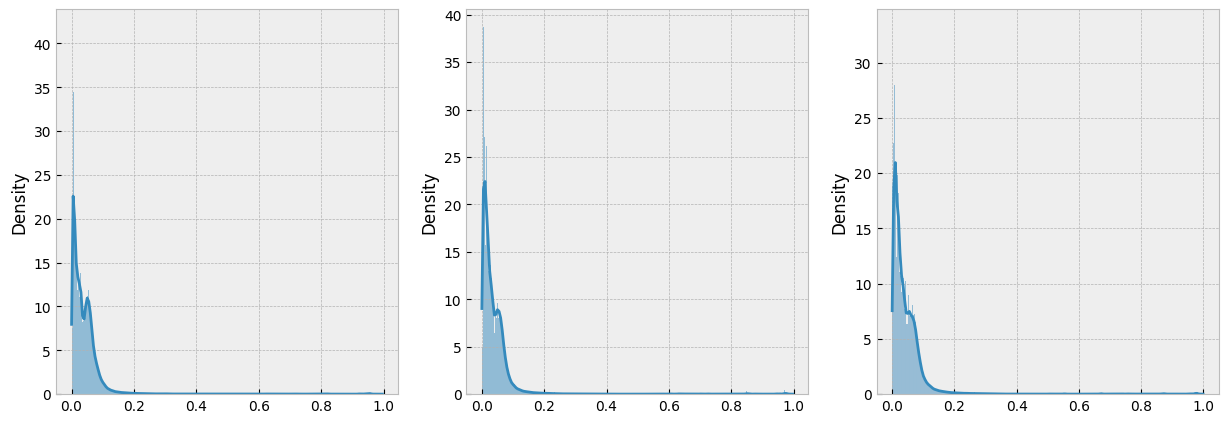

In [23]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
sns.histplot(fis_y_train_prob[:,1], ax=axs[0], stat='density', kde=True)
sns.histplot(fis_y_val_prob[:,1], ax=axs[1], stat='density', kde=True)
sns.histplot(fis_y_test_prob[:,1], ax=axs[2], stat='density', kde=True)
plt.show()

In [24]:
# phan bo deu va giong nhau, kha nang cao rang deploy ra dung du doan

In [25]:
def plot_precision_recall_with_thresholds(y_test, y_prob, ax):
    y_score = y_prob
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)
    f1 = [2 * (p * r) / (p + r) for p, r in zip(precisions, recalls)]
    max_idx = np.argmax(f1)
    df = pd.DataFrame({
        'threshold': [0] + thresholds.tolist(),
        'precision': precisions,
        'recall': recalls,
        'f1-score': f1
    })
    # dfl = pd.melt(df, id_vars='threshold', value_vars=['precision', 'recall', 'f1-score'], var_name='metric', value_name='value')
    # ax = sns.lineplot(dfl, x='threshold', y='value',hue='metric')
    sns.lineplot(df.set_index('threshold'), palette='tab10', ax=ax, )
    ax.plot(thresholds[max_idx], f1[max_idx], marker='*', color='r', markersize=10)
    ax.text(thresholds[max_idx], f1[max_idx], f'({thresholds[max_idx]:.2f},{f1[max_idx]:.2f})', ha='left',va='top')

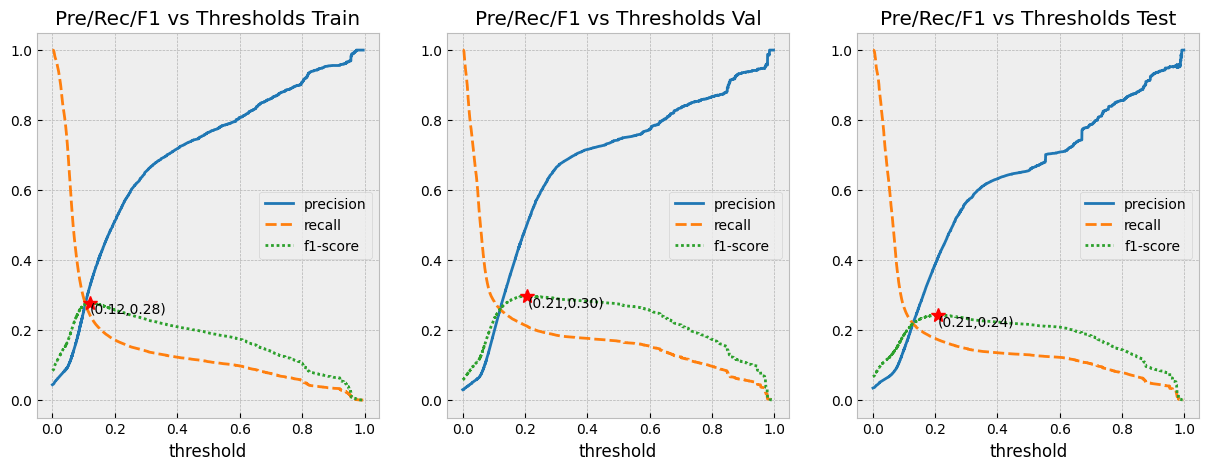

In [57]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
plot_precision_recall_with_thresholds(fis_y_train, fis_y_train_prob[:,1], ax=axs[0])
plot_precision_recall_with_thresholds(fis_y_val, fis_y_val_prob[:,1], ax=axs[1])
plot_precision_recall_with_thresholds(fis_y_test, fis_y_test_prob[:,1], ax=axs[2])
axs[0].set_title('Pre/Rec/F1 vs Thresholds Train')
axs[1].set_title('Pre/Rec/F1 vs Thresholds Val')
axs[2].set_title('Pre/Rec/F1 vs Thresholds Test')
plt.show()

In [50]:
print(metrics.classification_report(fis_y_train, fis_y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98   5305503
           1       0.76      0.11      0.19    243443

    accuracy                           0.96   5548946
   macro avg       0.86      0.55      0.59   5548946
weighted avg       0.95      0.96      0.94   5548946



In [51]:
print(metrics.classification_report(fis_y_val, fis_y_val_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99   2672333
           1       0.75      0.17      0.27     82294

    accuracy                           0.97   2754627
   macro avg       0.86      0.58      0.63   2754627
weighted avg       0.97      0.97      0.97   2754627



In [52]:
print(metrics.classification_report(fis_y_test, fis_y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98   2676494
           1       0.66      0.13      0.22     95512

    accuracy                           0.97   2772006
   macro avg       0.81      0.56      0.60   2772006
weighted avg       0.96      0.97      0.96   2772006



## FEATURE IMPORTANCE

<Axes: >

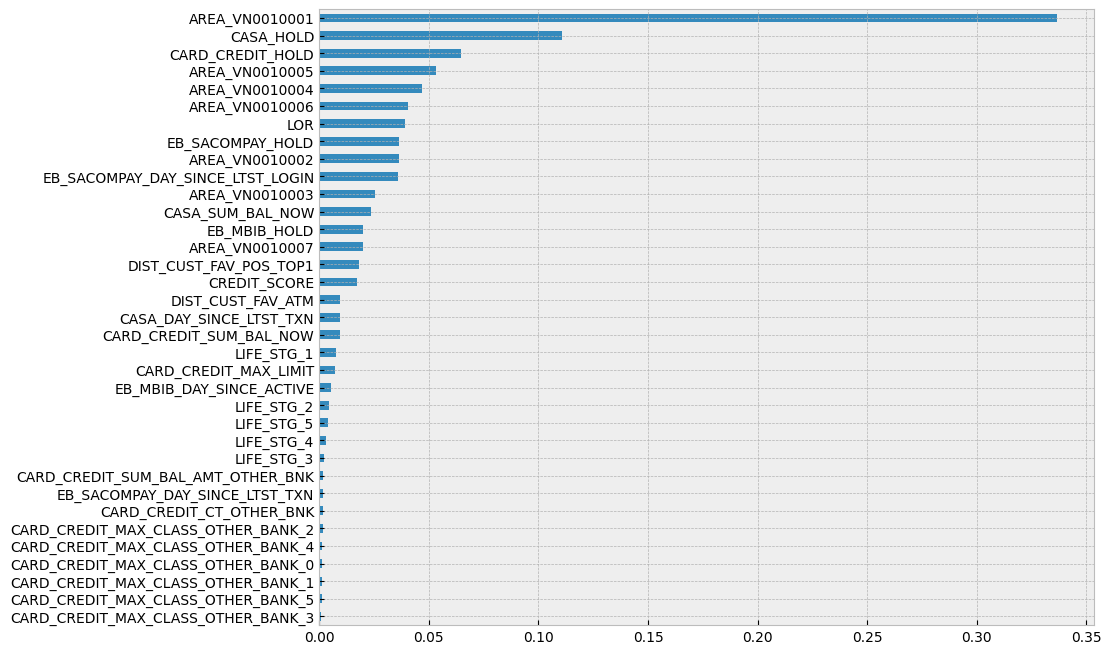

In [27]:
featimp_series = pd.Series(fis_model.feature_importances_, index=feat_list)
featimp_series.nlargest(40)[::-1].plot(kind='barh', figsize=(10, 8))

In [28]:
feat_aly = featimp_series.nlargest(10)
feat_aly

AREA_VN0010001                      0.336708
CASA_HOLD                           0.110712
CARD_CREDIT_HOLD                    0.064655
AREA_VN0010005                      0.053079
AREA_VN0010004                      0.046734
AREA_VN0010006                      0.040477
LOR                                 0.039031
EB_SACOMPAY_HOLD                    0.036380
AREA_VN0010002                      0.036214
EB_SACOMPAY_DAY_SINCE_LTST_LOGIN    0.036083
dtype: float32

# PREDICTION

## PRED-1

In [29]:
pred_ds1 = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/01-10-2022_pred_dataset.pkl', 'gzip')
pred_ds2 = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/01-11-2022_pred_dataset.pkl', 'gzip')
pred_ds3 = pd.read_pickle('/opt/bitnami/jupyterhub-singleuser/Reactivate/MLrun/train/16-01-2023_pred_dataset.pkl', 'gzip')

In [30]:
len(pred_ds1), len(pred_ds2), len(pred_ds3)

(2772006, 2794298, 1094257)

In [31]:
pred_ds1 = pred_ds1.set_index(['RPT_DT', 'CUSTOMER_CDE'])[feat_list]

In [32]:
ds1_pred = fis_model.predict(pred_ds1)

In [33]:
ds1_prob = fis_model.predict_proba(pred_ds1)

In [34]:
tmp = ds1_prob[:,1]

In [35]:
pd.Series(ds1_pred).value_counts()

0    2753090
1      18916
dtype: int64

<Axes: >

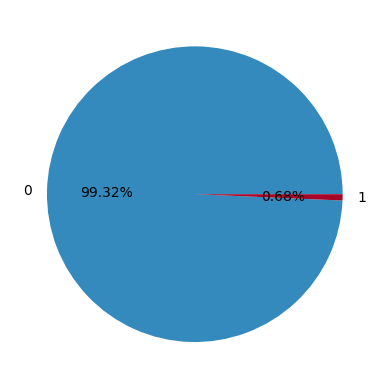

In [36]:
pd.Series(ds1_pred).value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='Count'>

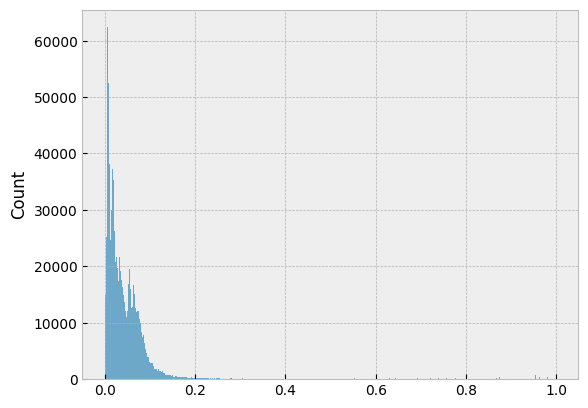

In [37]:
sns.histplot(tmp)

## PRED-2

In [38]:
pred_ds2 = pred_ds2.set_index(['RPT_DT', 'CUSTOMER_CDE'])[feat_list]

In [39]:
ds2_pred = fis_model.predict(pred_ds2)

In [40]:
ds2_prob = fis_model.predict_proba(pred_ds2)

In [41]:
pd.Series(ds2_pred).value_counts()

0    2779434
1      14864
dtype: int64

<Axes: >

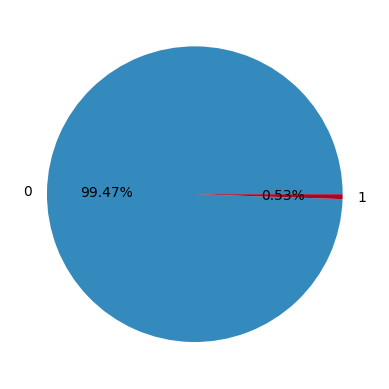

In [42]:
pd.Series(ds2_pred).value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='Count'>

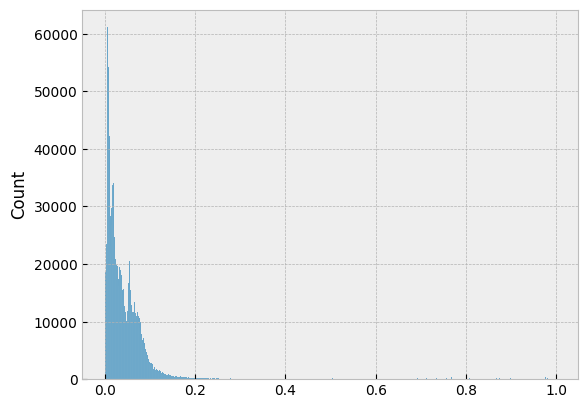

In [43]:
sns.histplot(ds2_prob[:,1])

## PRED-3

In [44]:
pred_ds3 = pred_ds3.set_index(['RPT_DT', 'CUSTOMER_CDE'])[feat_list]

In [45]:
ds3_pred = fis_model.predict(pred_ds3)

In [46]:
ds3_prob = fis_model.predict_proba(pred_ds3)

In [47]:
pd.Series(ds3_pred).value_counts()

0    1084104
1      10153
dtype: int64

<Axes: >

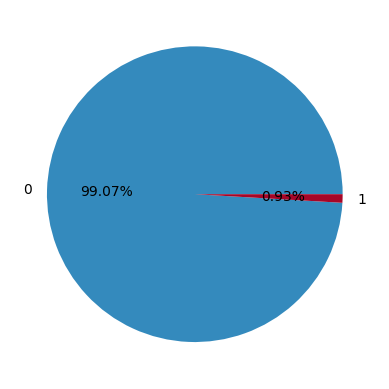

In [48]:
pd.Series(ds3_pred).value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='Count'>

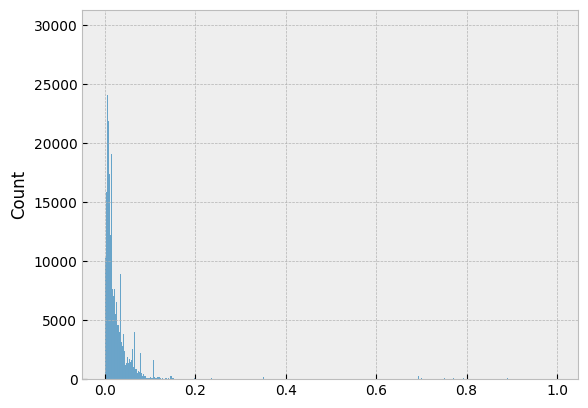

In [49]:
sns.histplot(ds3_prob[:,1])